In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

%matplotlib notebook
%matplotlib notebook

In [4]:
files = glob.glob('/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/*.jpg')
print(len(files))

18


In [6]:
for f in files:
    img = cv2.imread(f)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    ret,th = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)
    new_edges = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)

/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214407.jpg
(3024, 4032, 3)
/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/00000IMG_00000_BURST20200921213909946_COVER.jpg
(4032, 3024, 3)
/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214014.jpg
(4032, 3024, 3)
/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214112.jpg
(3024, 4032, 3)
/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214310.jpg
(3024, 4032, 3)
/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214132.jpg
(3024, 4032, 3)
/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214332.jpg
(3024, 4032, 3)
/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214520.jpg
(4032, 3024, 3)
/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214441.jpg
(3024, 4032, 3)
/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214

<IPython.core.display.Javascript object>


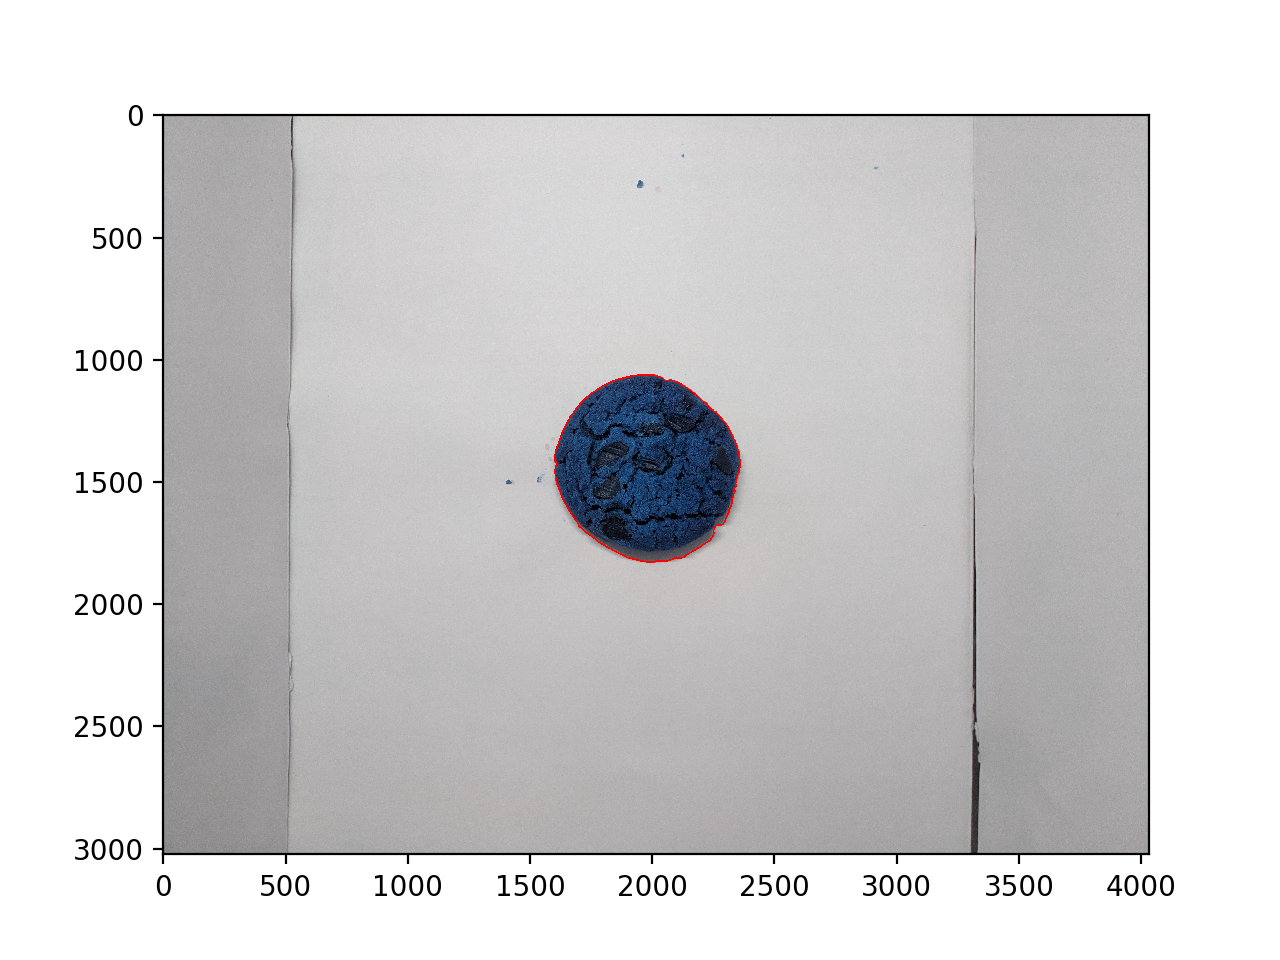

In [161]:
file = '/Users/sriharsha/Documents/Cookie_challenge/Data/raw_photos/IMG_20200921_214112.jpg'
from skimage import exposure
idx = 6

img = cv2.imread(files[idx])
# sigmoid_corrected = exposure.adjust_sigmoid(img, 0.3, 50)
gray = cv2.cvtColor(sigmoid_corrected, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),3)
ret,th = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)
kernel = np.ones((5,5),np.uint8)
new_edges = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)

_,contour, hierarchy = cv2.findContours(new_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


final_contours = []
for e, cnt in enumerate(contour):

    area = cv2.contourArea(contour[e])
    x,y,w,h = cv2.boundingRect(contour[e])
    rect_area = w*h
    extent = float(area)/rect_area

    if cv2.contourArea(contour[e])> 5000 and extent > 0.50 and (area/(img.shape[0] * img.shape[1]))< 0.7 and min(w,h)/max(w,h) > 0.5:
        final_contours.append(contour[e])
        
final_contours = np.asarray(final_contours)
mask1 = img.copy()
cv2.drawContours(mask1, final_contours, -1, (255,0,0), 5)
plt.imshow(mask1)


<IPython.core.display.Javascript object>


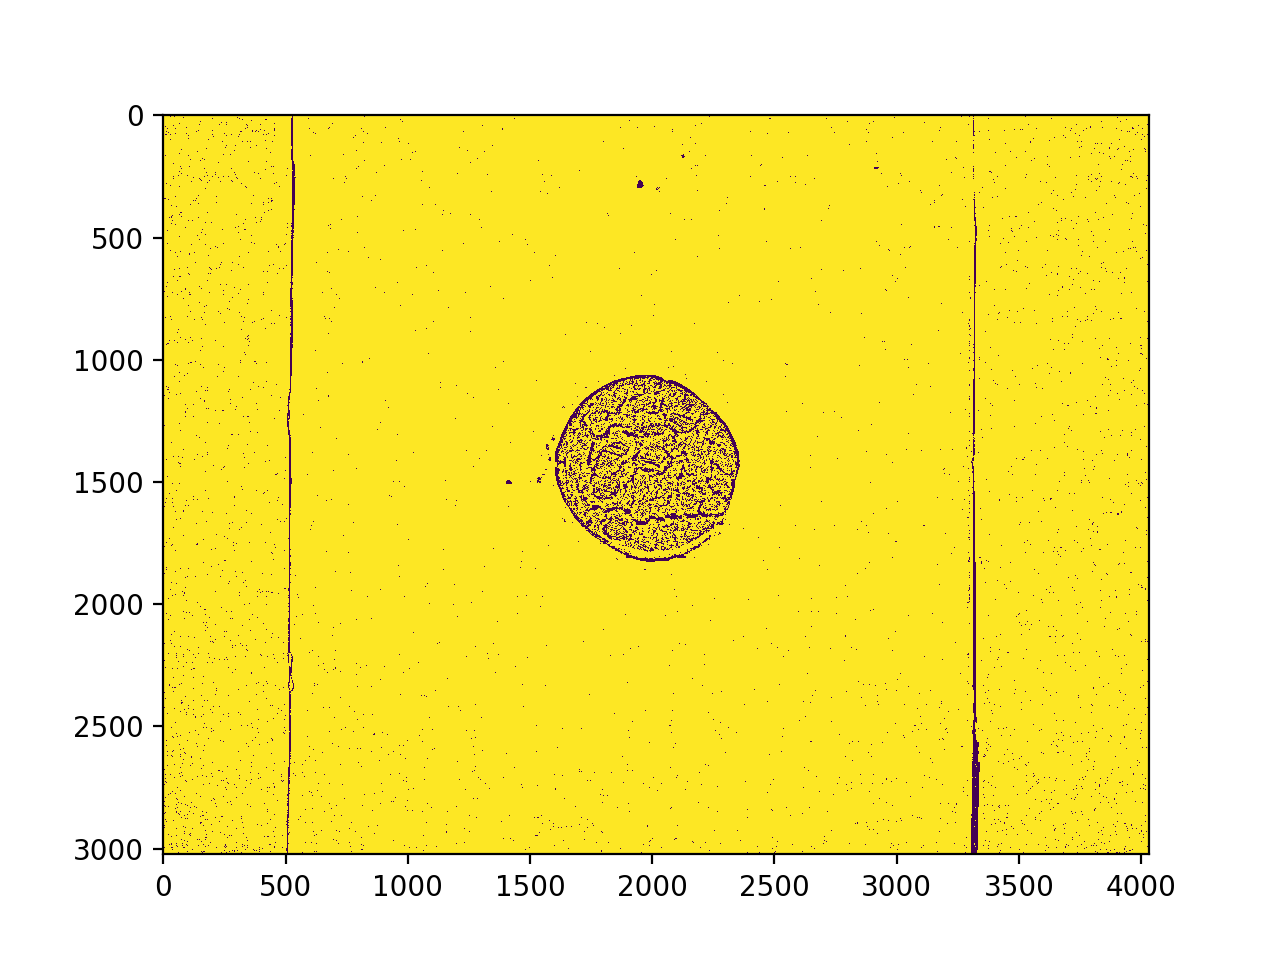

In [160]:
idx = 6

img = cv2.imread(files[idx])
sigmoid_corrected = exposure.adjust_log(img, 0.9)
gray = cv2.cvtColor(sigmoid_corrected, cv2.COLOR_BGR2GRAY)
thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 7) 
plt.imshow(thresh1)

<IPython.core.display.Javascript object>


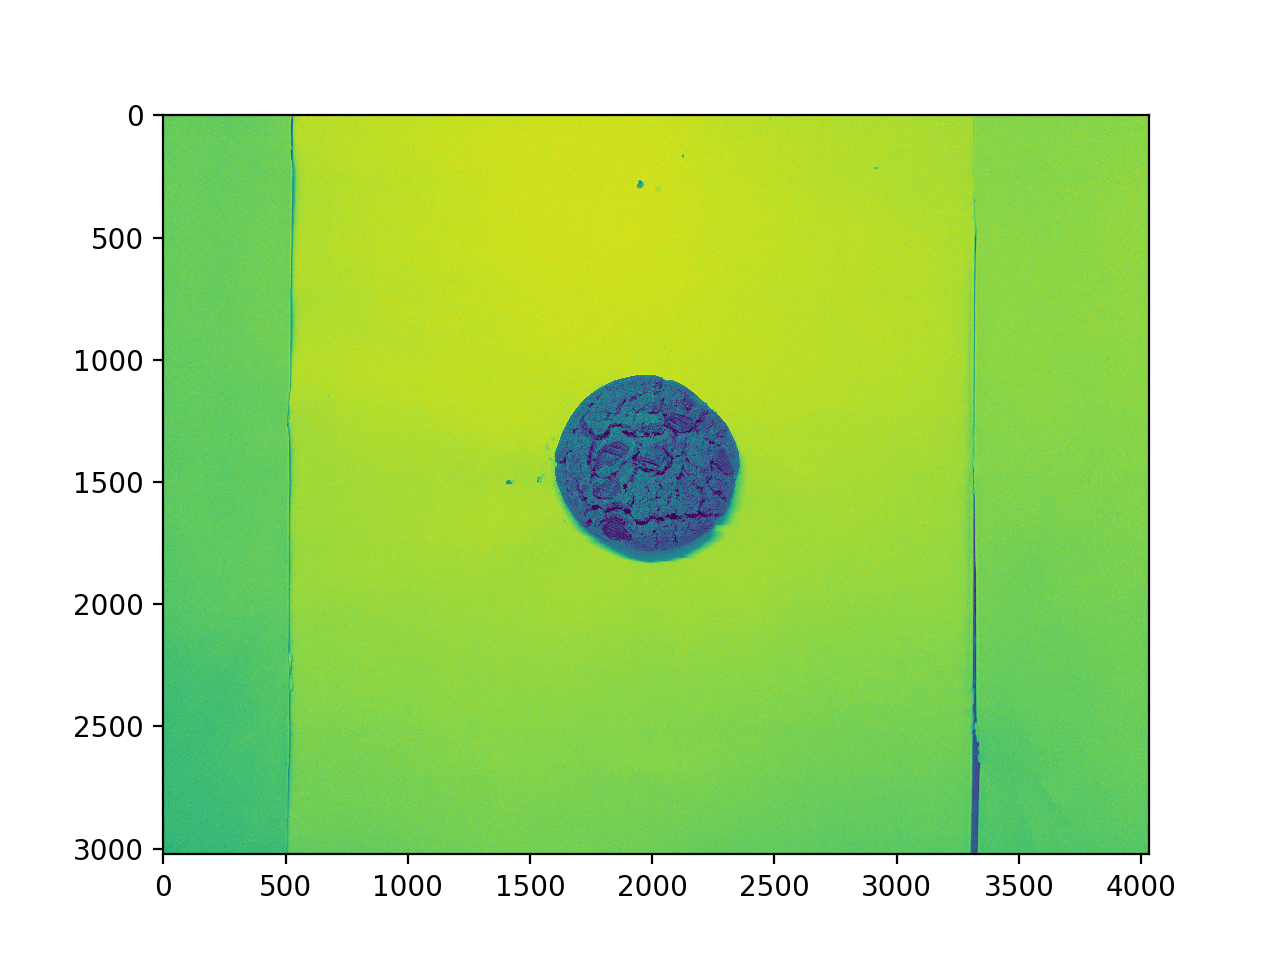

In [158]:
plt.imshow(gray)